In [2]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.family']='NanumGothicCoding'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.dpi']=300

In [3]:
from keras.models import Sequential

from keras.layers import Dense, Activation, LSTM, Dropout
import keras
from keras.layers.core import Dense
from keras.optimizers import RMSprop
from mpl_toolkits.mplot3d import Axes3D

Using TensorFlow backend.


In [3]:
df_weather = pd.read_csv('../data/dd/날씨통합.csv')
df_weather_1 = df_weather.iloc[:,1:]
df_weather_1.tail()

,지역,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),평균 해면기압(hPa),합계 일조시간(hr),평균 전운량(1/10),연도,연월,월
289027,충청북도,2020-05-20,12.48,6.22,18.16,0.0,1.58,70.90,1011.54,6.56,4.32,2020,2020-05,5
289028,충청북도,2020-05-21,15.70,7.28,22.26,0.0,1.16,67.56,1014.78,10.70,4.12,2020,2020-05,5
289029,충청북도,2020-05-22,17.72,12.56,23.54,0.0,2.06,68.64,1013.22,6.24,6.86,2020,2020-05,5
289030,충청북도,2020-05-23,19.20,13.66,25.76,0.0,1.56,64.40,1011.20,11.06,3.78,2020,2020-05,5
289031,충청북도,2020-05-24,18.74,14.42,23.48,4.0,1.80,75.44,1009.66,5.64,7.38,2020,2020-05,5


In [7]:
from sklearn.model_selection import train_test_split


In [54]:
df_weather_2=df_weather_1[df_weather_1['지역']=='강원도'].reset_index(drop=True)
data_x = df_weather_2[['평균기온(°C)','최저기온(°C)','최고기온(°C)','평균 이슬점온도(°C)','평균 상대습도(%)']]
data_y = df_weather_2['합계 일조시간(hr)']

# r = int(data_x.shape[0]*0.8)
X_train,X_test,y_train, y_test = train_test_split(data_x,data_y,test_size=0.2,random_state=46)

In [55]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((14318, 5), (3580, 5), (14318,), (3580,))

In [57]:
model = Sequential()
model.add(Dense(50, input_shape=(5,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu')) 
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu')) 
model.add(Dense(32, activation='relu')) 
model.add(Dense(32, activation='relu')) 
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 50)                300       
_________________________________________________________________
dense_42 (Dense)             (None, 64)                3264      
_________________________________________________________________
dense_43 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_44 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_45 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_46 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_47 (Dense)             (None, 64)               

In [58]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)

Train on 14318 samples, validate on 3580 samples
Epoch 1/1000
14318/14318 [==============================] - 1s 63us/step - loss: 5.3597 - accuracy: 0.0057 - val_loss: 3.5345 - val_accuracy: 0.0061
Epoch 2/1000
14318/14318 [==============================] - 1s 41us/step - loss: 3.5262 - accuracy: 0.0101 - val_loss: 3.0150 - val_accuracy: 0.0047
Epoch 3/1000
14318/14318 [==============================] - 1s 42us/step - loss: 3.2978 - accuracy: 0.0100 - val_loss: 2.9941 - val_accuracy: 0.0109
Epoch 4/1000
14318/14318 [==============================] - 1s 42us/step - loss: 3.2499 - accuracy: 0.0109 - val_loss: 2.9573 - val_accuracy: 0.0109
Epoch 5/1000
14318/14318 [==============================] - 1s 43us/step - loss: 3.2348 - accuracy: 0.0106 - val_loss: 2.8128 - val_accuracy: 0.0151
Epoch 6/1000
14318/14318 [==============================] - 1s 46us/step - loss: 3.2214 - accuracy: 0.0114 - val_loss: 2.8456 - val_accuracy: 0.0112
Epoch 7/1000
14318/14318 [==============================]

14318/14318 [==============================] - 1s 40us/step - loss: 2.9554 - accuracy: 0.0130 - val_loss: 2.7236 - val_accuracy: 0.0075
Epoch 110/1000
14318/14318 [==============================] - 1s 42us/step - loss: 2.9671 - accuracy: 0.0126 - val_loss: 2.7408 - val_accuracy: 0.0140
Epoch 111/1000
14318/14318 [==============================] - 1s 45us/step - loss: 2.9708 - accuracy: 0.0123 - val_loss: 2.7489 - val_accuracy: 0.0151
Epoch 112/1000
14318/14318 [==============================] - 1s 58us/step - loss: 2.9656 - accuracy: 0.0129 - val_loss: 2.7512 - val_accuracy: 0.0087
Epoch 113/1000
14318/14318 [==============================] - 1s 53us/step - loss: 2.9680 - accuracy: 0.0124 - val_loss: 2.7296 - val_accuracy: 0.0117
Epoch 114/1000
14318/14318 [==============================] - 1s 48us/step - loss: 2.9597 - accuracy: 0.0118 - val_loss: 2.7622 - val_accuracy: 0.0151
Epoch 115/1000
14318/14318 [==============================] - 1s 36us/step - loss: 2.9519 - accuracy: 0.0127 

14318/14318 [==============================] - 1s 41us/step - loss: 2.9113 - accuracy: 0.0122 - val_loss: 2.7866 - val_accuracy: 0.0106
Epoch 218/1000
14318/14318 [==============================] - 1s 39us/step - loss: 2.8949 - accuracy: 0.0121 - val_loss: 2.8048 - val_accuracy: 0.0115
Epoch 219/1000
14318/14318 [==============================] - 1s 41us/step - loss: 2.8940 - accuracy: 0.0124 - val_loss: 2.8780 - val_accuracy: 0.0159
Epoch 220/1000
14318/14318 [==============================] - 1s 39us/step - loss: 2.9107 - accuracy: 0.0129 - val_loss: 2.7954 - val_accuracy: 0.0120
Epoch 221/1000
14318/14318 [==============================] - 1s 40us/step - loss: 2.9066 - accuracy: 0.0117 - val_loss: 2.7379 - val_accuracy: 0.0151
Epoch 222/1000
14318/14318 [==============================] - 1s 39us/step - loss: 2.8946 - accuracy: 0.0131 - val_loss: 2.7585 - val_accuracy: 0.0123
Epoch 223/1000
14318/14318 [==============================] - 1s 39us/step - loss: 2.9073 - accuracy: 0.0126 

14318/14318 [==============================] - 1s 40us/step - loss: 2.8651 - accuracy: 0.0126 - val_loss: 2.8288 - val_accuracy: 0.0109
Epoch 326/1000
14318/14318 [==============================] - 1s 39us/step - loss: 2.8781 - accuracy: 0.0124 - val_loss: 2.8603 - val_accuracy: 0.0084
Epoch 327/1000
14318/14318 [==============================] - 1s 41us/step - loss: 2.8564 - accuracy: 0.0128 - val_loss: 2.7614 - val_accuracy: 0.0165
Epoch 328/1000
14318/14318 [==============================] - 1s 38us/step - loss: 2.8807 - accuracy: 0.0131 - val_loss: 2.8179 - val_accuracy: 0.0148
Epoch 329/1000
14318/14318 [==============================] - 1s 38us/step - loss: 2.8547 - accuracy: 0.0125 - val_loss: 2.8361 - val_accuracy: 0.0123
Epoch 330/1000
14318/14318 [==============================] - 1s 39us/step - loss: 2.8728 - accuracy: 0.0127 - val_loss: 2.7913 - val_accuracy: 0.0168
Epoch 331/1000
14318/14318 [==============================] - 1s 38us/step - loss: 2.8317 - accuracy: 0.0129 

14318/14318 [==============================] - 1s 44us/step - loss: 2.8472 - accuracy: 0.0131 - val_loss: 2.7936 - val_accuracy: 0.0126
Epoch 380/1000
14318/14318 [==============================] - 1s 47us/step - loss: 2.8370 - accuracy: 0.0129 - val_loss: 2.8899 - val_accuracy: 0.0106
Epoch 381/1000
14318/14318 [==============================] - 1s 49us/step - loss: 2.8581 - accuracy: 0.0128 - val_loss: 2.8062 - val_accuracy: 0.0126
Epoch 382/1000
14318/14318 [==============================] - 1s 41us/step - loss: 2.8568 - accuracy: 0.0124 - val_loss: 2.7913 - val_accuracy: 0.0137
Epoch 383/1000
14318/14318 [==============================] - 1s 40us/step - loss: 2.8412 - accuracy: 0.0127 - val_loss: 2.9706 - val_accuracy: 0.0103
Epoch 384/1000
14318/14318 [==============================] - 1s 42us/step - loss: 2.8194 - accuracy: 0.0127 - val_loss: 2.8481 - val_accuracy: 0.0134
Epoch 385/1000
14318/14318 [==============================] - 1s 64us/step - loss: 2.8501 - accuracy: 0.0130 

14318/14318 [==============================] - 1s 39us/step - loss: 2.8370 - accuracy: 0.0129 - val_loss: 2.8321 - val_accuracy: 0.0131
Epoch 488/1000
14318/14318 [==============================] - 1s 39us/step - loss: 2.8121 - accuracy: 0.0128 - val_loss: 2.8521 - val_accuracy: 0.0115
Epoch 489/1000
14318/14318 [==============================] - 1s 43us/step - loss: 2.8225 - accuracy: 0.0133 - val_loss: 2.9206 - val_accuracy: 0.0123
Epoch 490/1000
14318/14318 [==============================] - 1s 43us/step - loss: 2.8095 - accuracy: 0.0138 - val_loss: 2.8634 - val_accuracy: 0.0134
Epoch 491/1000
14318/14318 [==============================] - 1s 41us/step - loss: 2.8194 - accuracy: 0.0128 - val_loss: 2.8221 - val_accuracy: 0.0115
Epoch 492/1000
14318/14318 [==============================] - 1s 46us/step - loss: 2.8137 - accuracy: 0.0131 - val_loss: 2.8036 - val_accuracy: 0.0140
Epoch 493/1000
14318/14318 [==============================] - 1s 42us/step - loss: 2.7966 - accuracy: 0.0131 

14318/14318 [==============================] - 1s 39us/step - loss: 2.8053 - accuracy: 0.0135 - val_loss: 2.8746 - val_accuracy: 0.0134
Epoch 542/1000
14318/14318 [==============================] - 1s 39us/step - loss: 2.8030 - accuracy: 0.0129 - val_loss: 2.8176 - val_accuracy: 0.0123
Epoch 543/1000
14318/14318 [==============================] - 1s 39us/step - loss: 2.7997 - accuracy: 0.0131 - val_loss: 2.7991 - val_accuracy: 0.0137
Epoch 544/1000
14318/14318 [==============================] - 1s 38us/step - loss: 2.7768 - accuracy: 0.0131 - val_loss: 2.9072 - val_accuracy: 0.0128
Epoch 545/1000
14318/14318 [==============================] - 1s 38us/step - loss: 2.7918 - accuracy: 0.0142 - val_loss: 2.8427 - val_accuracy: 0.0142
Epoch 546/1000
14318/14318 [==============================] - 1s 38us/step - loss: 2.7934 - accuracy: 0.0141 - val_loss: 2.8514 - val_accuracy: 0.0112
Epoch 547/1000
14318/14318 [==============================] - 1s 38us/step - loss: 2.8022 - accuracy: 0.0138 

14318/14318 [==============================] - 1s 40us/step - loss: 2.8432 - accuracy: 0.0122 - val_loss: 2.8365 - val_accuracy: 0.0117
Epoch 596/1000
14318/14318 [==============================] - 1s 38us/step - loss: 2.7886 - accuracy: 0.0129 - val_loss: 2.8378 - val_accuracy: 0.0142
Epoch 597/1000
14318/14318 [==============================] - 1s 39us/step - loss: 2.7859 - accuracy: 0.0133 - val_loss: 2.8596 - val_accuracy: 0.0140
Epoch 598/1000
14318/14318 [==============================] - 1s 39us/step - loss: 2.7648 - accuracy: 0.0135 - val_loss: 2.9450 - val_accuracy: 0.0112
Epoch 599/1000
14318/14318 [==============================] - 1s 39us/step - loss: 2.7912 - accuracy: 0.0131 - val_loss: 3.0444 - val_accuracy: 0.0011
Epoch 600/1000
14318/14318 [==============================] - 1s 39us/step - loss: 2.8009 - accuracy: 0.0122 - val_loss: 2.8387 - val_accuracy: 0.0137
Epoch 601/1000
14318/14318 [==============================] - 1s 40us/step - loss: 2.7918 - accuracy: 0.0138 

14318/14318 [==============================] - 1s 46us/step - loss: 2.8093 - accuracy: 0.0130 - val_loss: 2.8757 - val_accuracy: 0.0112
Epoch 704/1000
14318/14318 [==============================] - 1s 42us/step - loss: 2.7674 - accuracy: 0.0131 - val_loss: 2.8822 - val_accuracy: 0.0117
Epoch 705/1000
14318/14318 [==============================] - 1s 43us/step - loss: 2.7411 - accuracy: 0.0139 - val_loss: 2.8591 - val_accuracy: 0.0128
Epoch 706/1000
14318/14318 [==============================] - 1s 42us/step - loss: 2.7532 - accuracy: 0.0138 - val_loss: 2.8883 - val_accuracy: 0.0148
Epoch 707/1000
14318/14318 [==============================] - 1s 43us/step - loss: 2.7462 - accuracy: 0.0137 - val_loss: 2.8683 - val_accuracy: 0.0123
Epoch 708/1000
14318/14318 [==============================] - 1s 40us/step - loss: 2.7572 - accuracy: 0.0135 - val_loss: 2.9232 - val_accuracy: 0.0134
Epoch 709/1000
14318/14318 [==============================] - 1s 41us/step - loss: 2.7621 - accuracy: 0.0125 

14318/14318 [==============================] - 1s 43us/step - loss: 2.7024 - accuracy: 0.0134 - val_loss: 2.8462 - val_accuracy: 0.0148
Epoch 812/1000
14318/14318 [==============================] - 1s 44us/step - loss: 2.7369 - accuracy: 0.0128 - val_loss: 2.8659 - val_accuracy: 0.0131
Epoch 813/1000
14318/14318 [==============================] - 1s 44us/step - loss: 2.7365 - accuracy: 0.0137 - val_loss: 2.8836 - val_accuracy: 0.0134
Epoch 814/1000
14318/14318 [==============================] - 1s 42us/step - loss: 2.7374 - accuracy: 0.0132 - val_loss: 2.8679 - val_accuracy: 0.0112
Epoch 815/1000
14318/14318 [==============================] - 1s 44us/step - loss: 2.7632 - accuracy: 0.0133 - val_loss: 2.8669 - val_accuracy: 0.0128
Epoch 816/1000
14318/14318 [==============================] - 1s 43us/step - loss: 2.7166 - accuracy: 0.0135 - val_loss: 2.8974 - val_accuracy: 0.0140
Epoch 817/1000
14318/14318 [==============================] - 1s 42us/step - loss: 2.7222 - accuracy: 0.0140 

14318/14318 [==============================] - 1s 41us/step - loss: 2.7168 - accuracy: 0.0137 - val_loss: 2.8413 - val_accuracy: 0.0126
Epoch 920/1000
14318/14318 [==============================] - 1s 44us/step - loss: 2.7774 - accuracy: 0.0132 - val_loss: 2.8944 - val_accuracy: 0.0134
Epoch 921/1000
14318/14318 [==============================] - 1s 41us/step - loss: 2.7456 - accuracy: 0.0142 - val_loss: 2.9339 - val_accuracy: 0.0106
Epoch 922/1000
14318/14318 [==============================] - 1s 42us/step - loss: 2.7254 - accuracy: 0.0137 - val_loss: 2.8665 - val_accuracy: 0.0142
Epoch 923/1000
14318/14318 [==============================] - 1s 41us/step - loss: 2.7227 - accuracy: 0.0135 - val_loss: 2.8781 - val_accuracy: 0.0137
Epoch 924/1000
14318/14318 [==============================] - 1s 43us/step - loss: 2.7018 - accuracy: 0.0144 - val_loss: 2.9647 - val_accuracy: 0.0089
Epoch 925/1000
14318/14318 [==============================] - 1s 43us/step - loss: 2.8145 - accuracy: 0.0128 

In [59]:
pred = model.predict(X_test)

In [ ]:
model

In [168]:
X_test.shape

(3507, 4)

In [151]:
model.predict(np.array([-0.676923,-6.492308,6.823077,0.884615]).reshape(1,4))
# np.array([-3.138462,-7.915385,1.692308,4.553846]).reshape(1,4).shape

array([[71.12494]], dtype=float32)

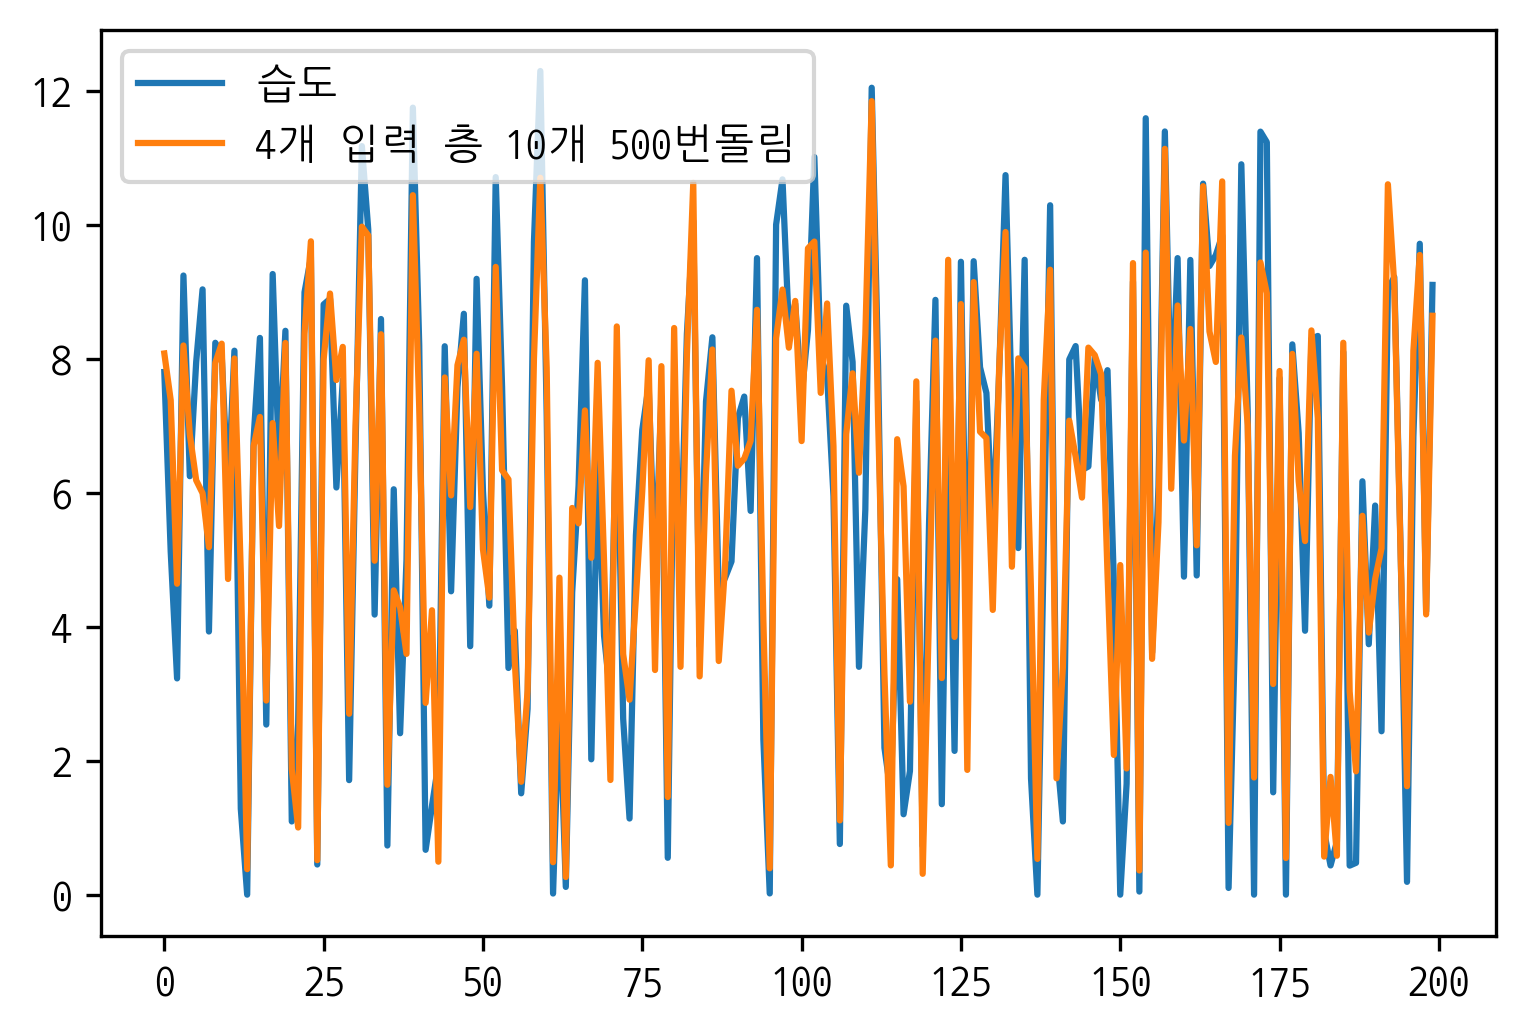

In [60]:
# Dense
fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(y_test[:200].reset_index(drop=True),label='습도')
ax.plot(pred[:200],label="4개 입력 층 10개 500번돌림")
# '평균기온(°C)','최저기온(°C)','최고기온(°C)','ㅇ'이슬점']
plt.legend()
plt.show()

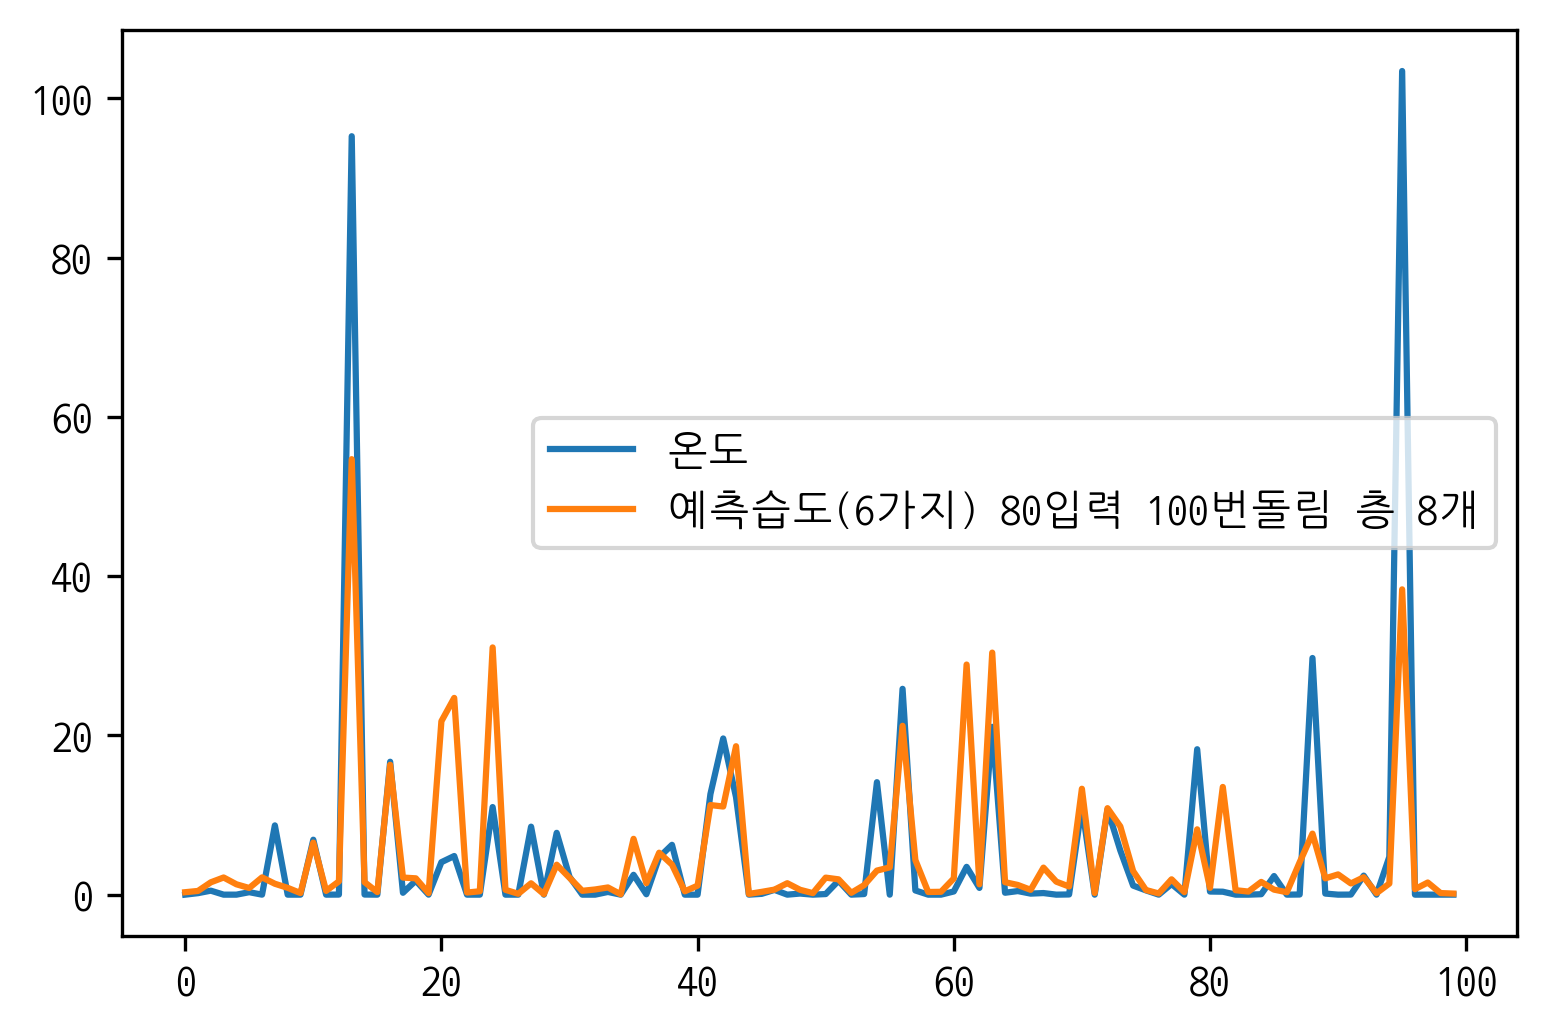

In [50]:
# 습도예측 Dense
fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(y_test[:100].reset_index(drop=True),label='온도')
ax.plot(pred[:100],label="예측습도(6가지) 80입력 100번돌림 층 8개")
# '평균기온(°C)','일강수량(mm)','최대 풍속(m/s)','평균 풍속(m/s)','합계 일조시간(hr)','합계 일사량(MJ/m2)'
plt.legend()
plt.show()

In [64]:
pred1 = model.predict(kkk)

In [43]:
pred2 = model.predict(np.array([1.167857,-4.014286,6.350000,-8.871429]).reshape(1,4))
pred2

array([[52.086388]], dtype=float32)

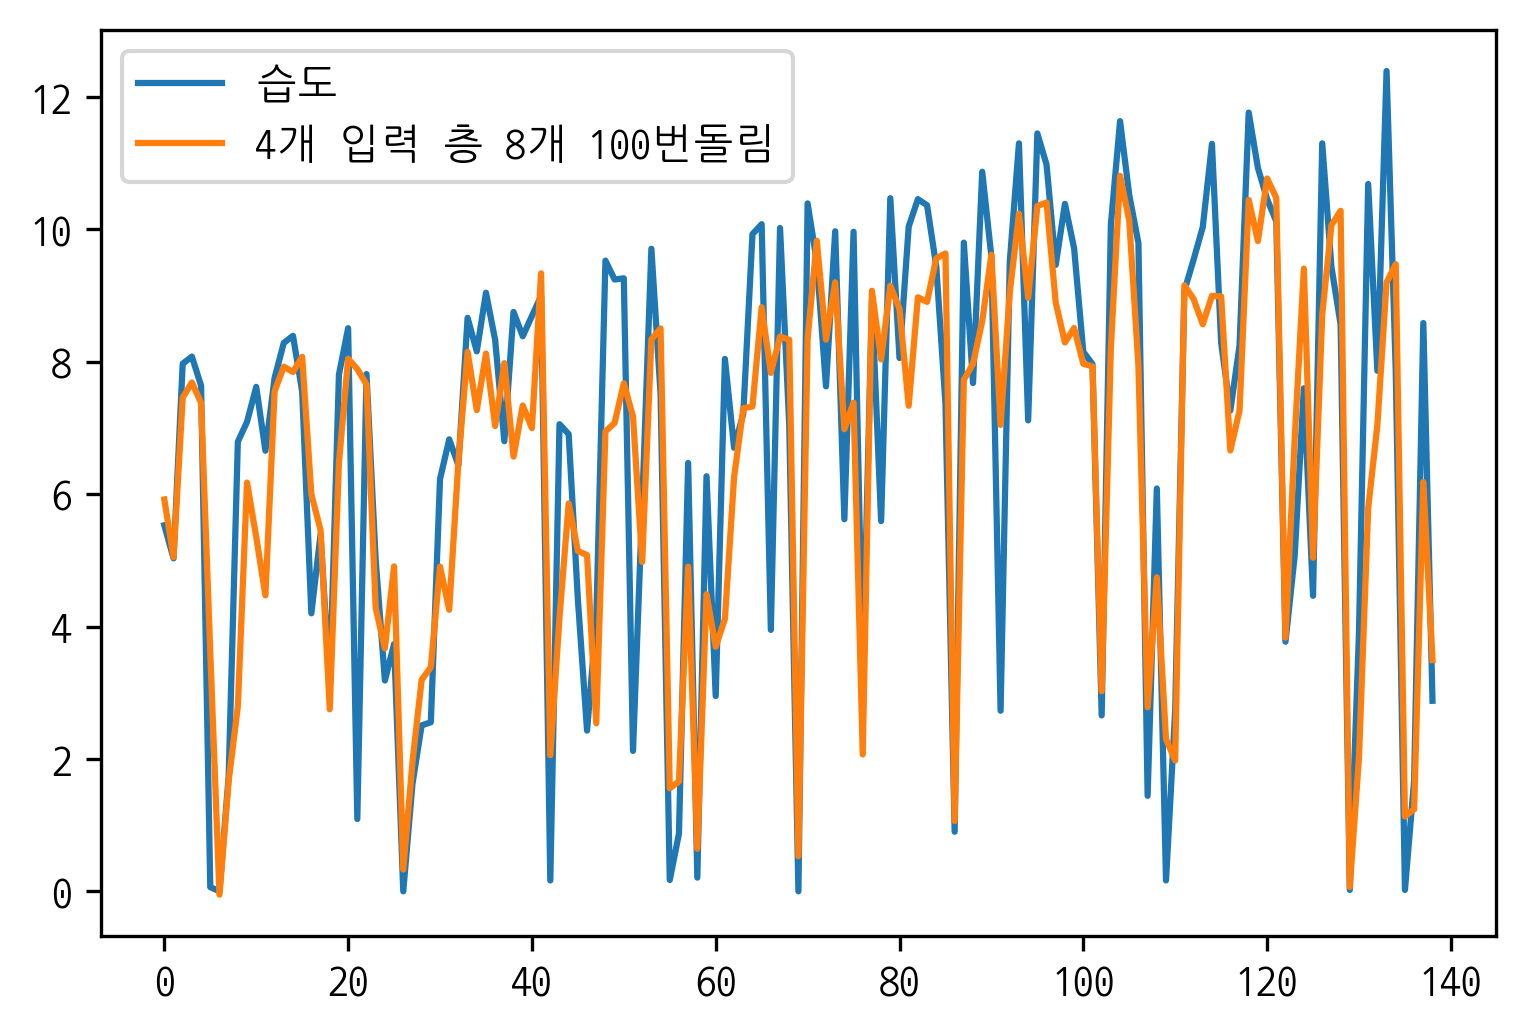

In [65]:
fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(kk2[:139].reset_index(drop=True),label='습도')
ax.plot(pred1[:139],label="4개 입력 층 8개 100번돌림")
# '평균기온(°C)','최저기온(°C)','최고기온(°C)','d이슬점']
plt.legend()
plt.show()

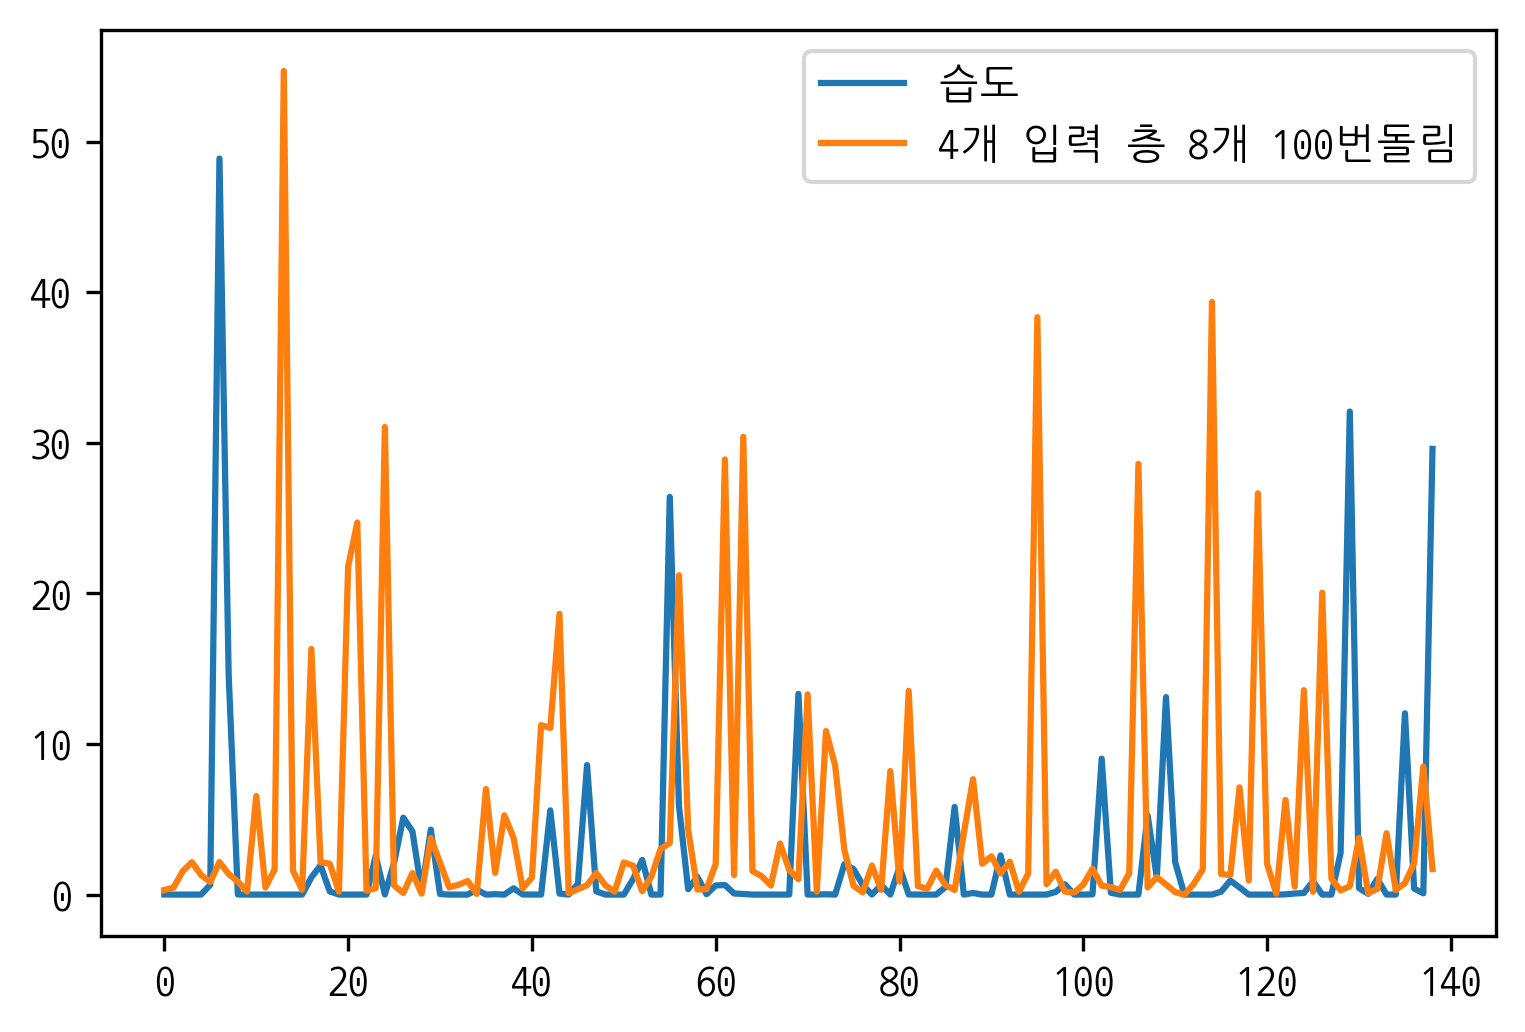

In [53]:
fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(kk2[:139].reset_index(drop=True),label='습도')
ax.plot(pred[:139],label="4개 입력 층 8개 100번돌림")
# '평균기온(°C)','최저기온(°C)','최고기온(°C)','평균 풍속(m/s)']
plt.legend()
plt.show()

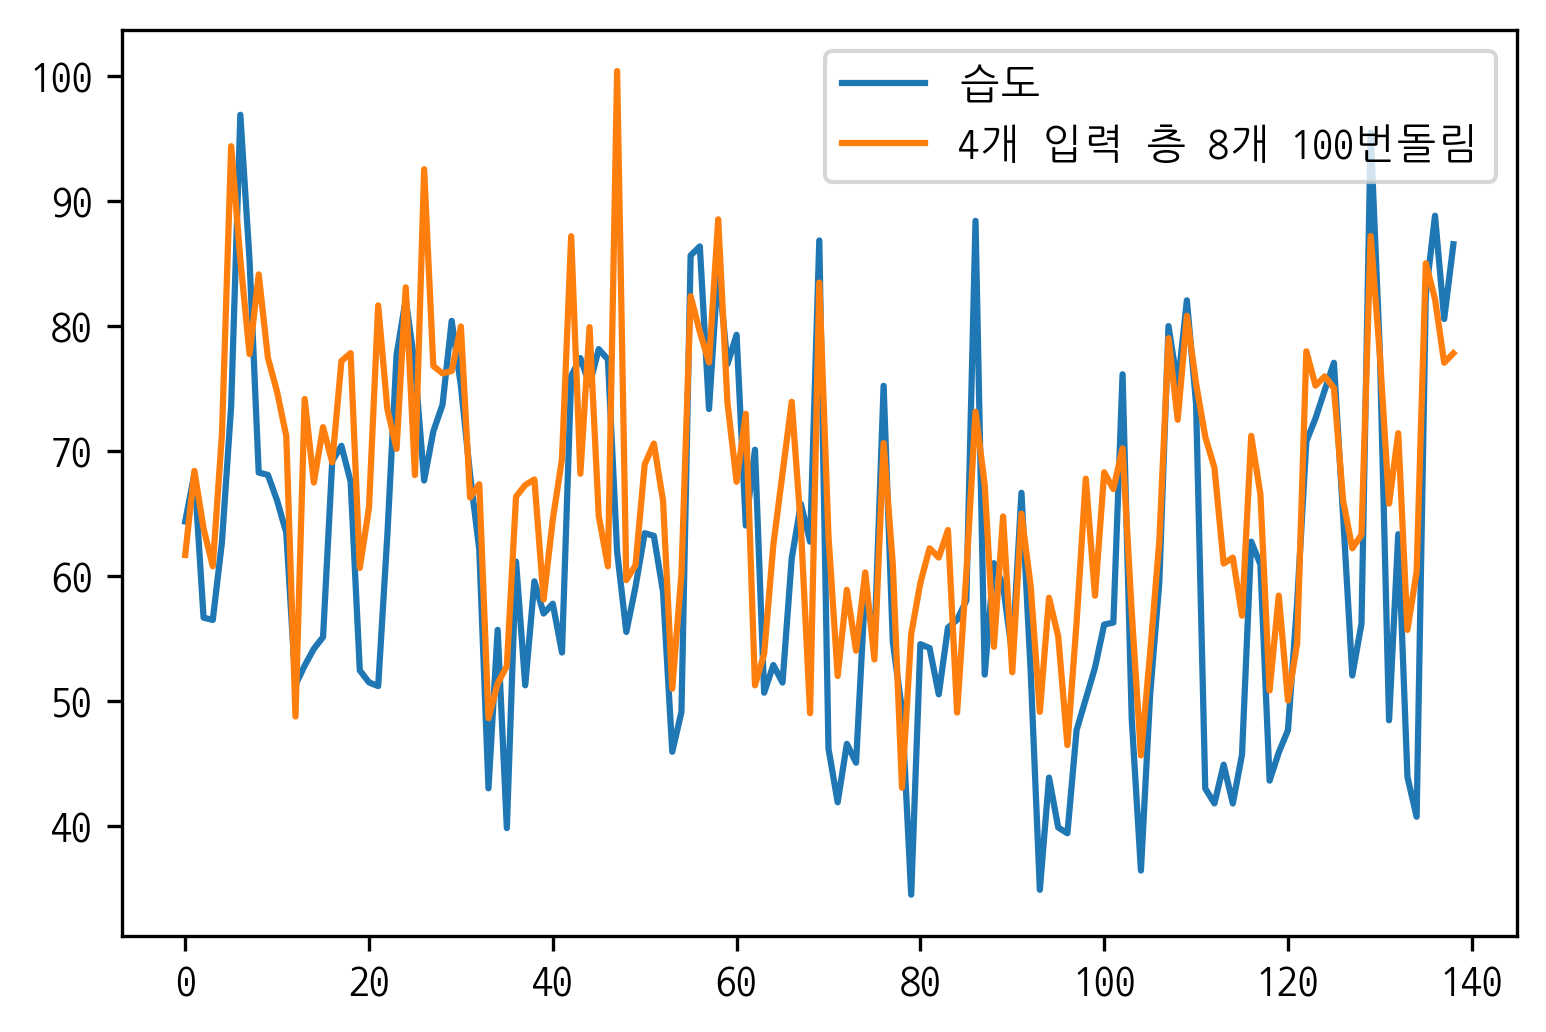

In [188]:

fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(kk2[:139].reset_index(drop=True),label='습도')
ax.plot(pred[:139],label="4개 입력 층 9개 1000번돌림")
# '평균기온(°C)','최저기온(°C)','최고기온(°C)','평균 풍속(m/s)']
plt.legend()
plt.show()

In [ ]:
# 정제한것 역산하기

In [5]:
df_weather = pd.read_csv('../data/dd/mainweather.csv')
df_weather = df_weather.iloc[:,1:]
df_weather.head()

,지역,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s),평균 이슬점온도(°C),평균 상대습도(%),평균 현지기압(hPa),합계 일조시간(hr)
0,강원도,1971-01-01,0.266667,-4.300000,4.833333,0.000000,9.700000,3.800000,-10.666667,48.700000,1019.766667,7.866667
1,강원도,1971-01-02,-0.833333,-6.033333,4.366667,0.000000,5.766667,2.700000,-13.333333,46.433333,1022.366667,7.200000
2,강원도,1971-01-03,-1.816667,-6.700000,3.066667,1.200000,6.600000,2.566667,-10.100000,57.100000,1015.833333,5.500000
3,강원도,1971-01-04,-6.550000,-11.233333,-1.866667,0.266667,12.700000,5.700000,-13.766667,59.033333,1011.733333,2.866667
4,강원도,1971-01-05,-9.216667,-14.666667,-3.766667,0.000000,4.500000,2.533333,-17.333333,56.266667,1022.400000,8.066667


In [6]:
ef_mean= df_weather[df_weather['지역']=='경상북도']
# ef_mean= ef_mean[ef_mean['일시'].str.contains('01-01')]
ef_mean.shape

(17898, 12)

In [7]:
seq_len =365
result=[]
sequence_length = seq_len+1 # 51번째가 예측값
for index in range(len(ef_mean['최저기온(°C)'])-sequence_length):
    result.append(
        ef_mean['최저기온(°C)'][index:index+sequence_length])
print(len(result))
result =np.array(result)

17532


In [8]:
nomalized_data =[]
for window in result:
    # 첫번째 값을 0으로 설정, 즉 자기 자신/ 자기자신-1=0
    # 두번째 값은 두번째 값/ 첫번째 값 -1 = 결과값
    # 계속 진행하면 결과는 정규화된 값을 얻을 수 있다.
    nomalized_window = [((float(p) / 10)) for p in window]
    nomalized_data.append(nomalized_window)
result = np.array(nomalized_data)
result

array([[-0.07      , -0.135     , -0.26      , ...,  0.345     ,
         0.29      , -0.04666667],
       [-0.135     , -0.26      , -0.735     , ...,  0.29      ,
        -0.04666667, -0.26      ],
       [-0.26      , -0.735     , -0.865     , ..., -0.04666667,
        -0.26      , -0.18666667],
       ...,
       [-0.89714286, -0.92428571, -1.06214286, ..., -0.30285714,
        -0.58714286, -0.46357143],
       [-0.92428571, -1.06214286, -0.57785714, ..., -0.58714286,
        -0.46357143,  0.15928571],
       [-1.06214286, -0.57785714, -0.71785714, ..., -0.46357143,
         0.15928571, -0.58642857]])

In [10]:
row=int(result.shape[0]*0.8)
X_train = result[:row,:365]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
y_train = result[:row,-1]
X_test = result[row:,:365]
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
y_test = result[row:,-1]
X_train.shape, X_test.shape, y_test.shape

((14025, 365, 1), (3507, 365, 1), (3507,))

In [73]:
from keras.models import Sequential
model = Sequential()
model.add(LSTM(128,input_shape=(180,1),return_sequences=True)) 
# 시계열 데이터에서는 LSTM을 사용한다
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(1, activation='linear')) # 답은 하나기 때문 Dense를 사용
model.compile('Adam','mse')
# 단계별로 예측 rmsprop
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 180, 128)          66560     
_________________________________________________________________
lstm_2 (LSTM)                (None, 180, 64)           49408     
_________________________________________________________________
lstm_3 (LSTM)                (None, 180, 64)           33024     
_________________________________________________________________
lstm_4 (LSTM)                (None, 180, 64)           33024     
_________________________________________________________________
lstm_5 (LSTM)                (None, 180, 64)           33024     
_________________________________________________________________
lstm_6 (LSTM)                (None, 180, 64)           33024     
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)               

In [158]:
hist = model.fit(X_train, y_train, epochs=7, validation_data=(X_test, y_test))

Train on 13852 samples, validate on 3464 samples
Epoch 1/7
13852/13852 [==============================] - 653s 47ms/step - loss: 0.0226 - val_loss: 0.0175
Epoch 2/7
13852/13852 [==============================] - 650s 47ms/step - loss: 0.0171 - val_loss: 0.0177
Epoch 3/7
13852/13852 [==============================] - 646s 47ms/step - loss: 0.0164 - val_loss: 0.0165
Epoch 4/7
13852/13852 [==============================] - 544s 39ms/step - loss: 0.0158 - val_loss: 0.0168
Epoch 5/7
13852/13852 [==============================] - 303s 22ms/step - loss: 0.0130 - val_loss: 0.0120
Epoch 6/7
13852/13852 [==============================] - 248s 18ms/step - loss: 0.0110 - val_loss: 0.0114
Epoch 7/7
13852/13852 [==============================] - 271s 20ms/step - loss: 0.0108 - val_loss: 0.0110


In [981]:
model.save('../data/dd/model_경상북도_최저기온_나누기10.h5)

SyntaxError: EOL while scanning string literal (<ipython-input-981-f5c89bec8bf5>, line 1)

In [982]:
from tensorflow.python.keras.models import load_model
model = load_model('../data/dd/model_경상북도_최저기온_나누기10.h5')

In [984]:
pred = model.predict(X_test)


In [ ]:
pred1 = model.predict(kkk)

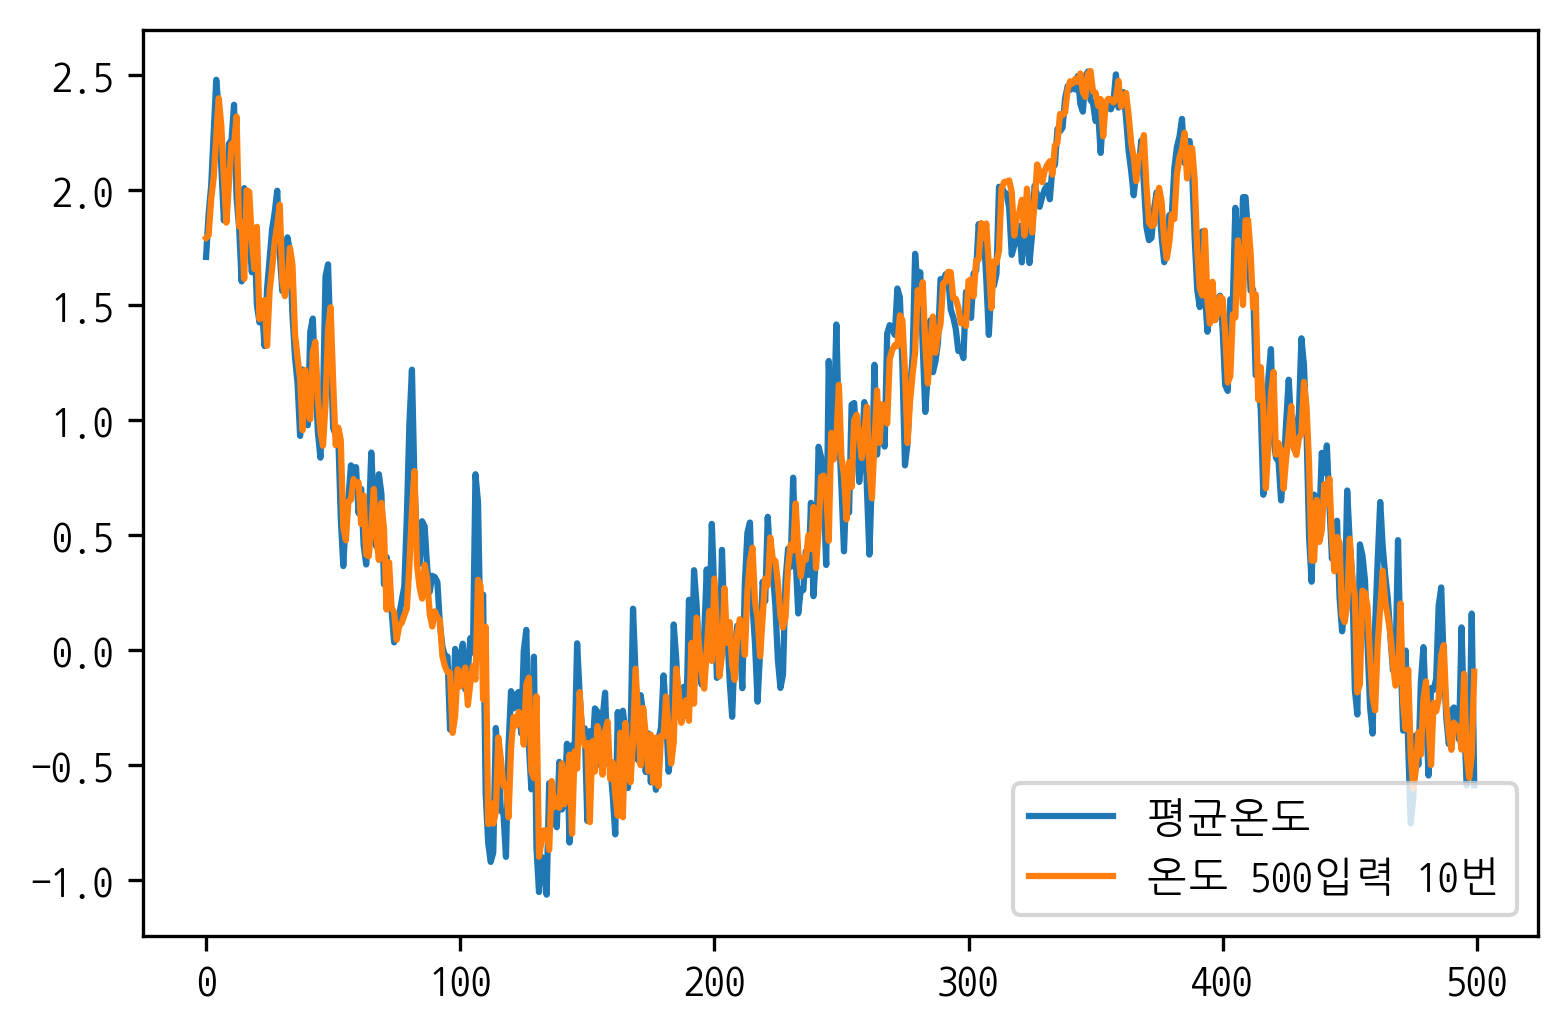

In [985]:
fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(y_test[-500:],label='평균온도')
ax.plot(pred[-500:],label="온도 500입력 10번")
plt.legend()
plt.show()

In [989]:
v = ef_mean['최저기온(°C)'][-365:]/10

# v.reshape(1,180,1)
kk= np.array(v).reshape(1,365,1)
print(kk)
n = model.predict(kk)
n

[[[-7.17857143e-01]
  [-7.37142857e-01]
  [-7.69285714e-01]
  [-4.85000000e-01]
  [-6.92142857e-01]
  [-6.61428571e-01]
  [-4.06428571e-01]
  [-8.35714286e-01]
  [-4.13571429e-01]
  [-4.41428571e-01]
  [ 3.00000000e-02]
  [-1.92857143e-01]
  [-3.60714286e-01]
  [-3.39285714e-01]
  [-7.41428571e-01]
  [-3.51538462e-01]
  [-4.50714286e-01]
  [-2.52857143e-01]
  [-2.67142857e-01]
  [-4.98571429e-01]
  [-2.95384615e-01]
  [-1.84615385e-01]
  [-4.93076923e-01]
  [-4.96428571e-01]
  [-6.29285714e-01]
  [-8.00000000e-01]
  [-2.68571429e-01]
  [-6.86428571e-01]
  [-2.62857143e-01]
  [-3.54285714e-01]
  [-5.98571429e-01]
  [-3.86428571e-01]
  [ 1.80769231e-01]
  [-1.07142857e-01]
  [-4.77857143e-01]
  [-1.95000000e-01]
  [-2.76428571e-01]
  [-5.29285714e-01]
  [-3.61428571e-01]
  [-5.74285714e-01]
  [-3.91428571e-01]
  [-6.06428571e-01]
  [-3.87142857e-01]
  [-3.35714286e-01]
  [-1.09230769e-01]
  [-2.78571429e-01]
  [-5.27857143e-01]
  [-4.37857143e-01]
  [ 1.12142857e-01]
  [-3.71428571e-02]


array([[-0.53969973]], dtype=float32)

In [990]:
v = list(v)

In [1117]:

n= float(n)
n
v.append(n)
print(v[-5:])

k = np.array(v[-365:]).reshape(1,365,1)
n = model.predict(k)
n

[0.45216289162635803, 0.4730629026889801, 0.49393028020858765, 0.5147517919540405, 0.5355148315429688]


array([[0.5562074]], dtype=float32)

In [256]:

k = np.array(v[-365:]).reshape(1,365,1)
n = model.predict(k)
n

array([[5.54506]], dtype=float32)

In [1118]:
v123 = np.array(v)
v123.shape

(492,)

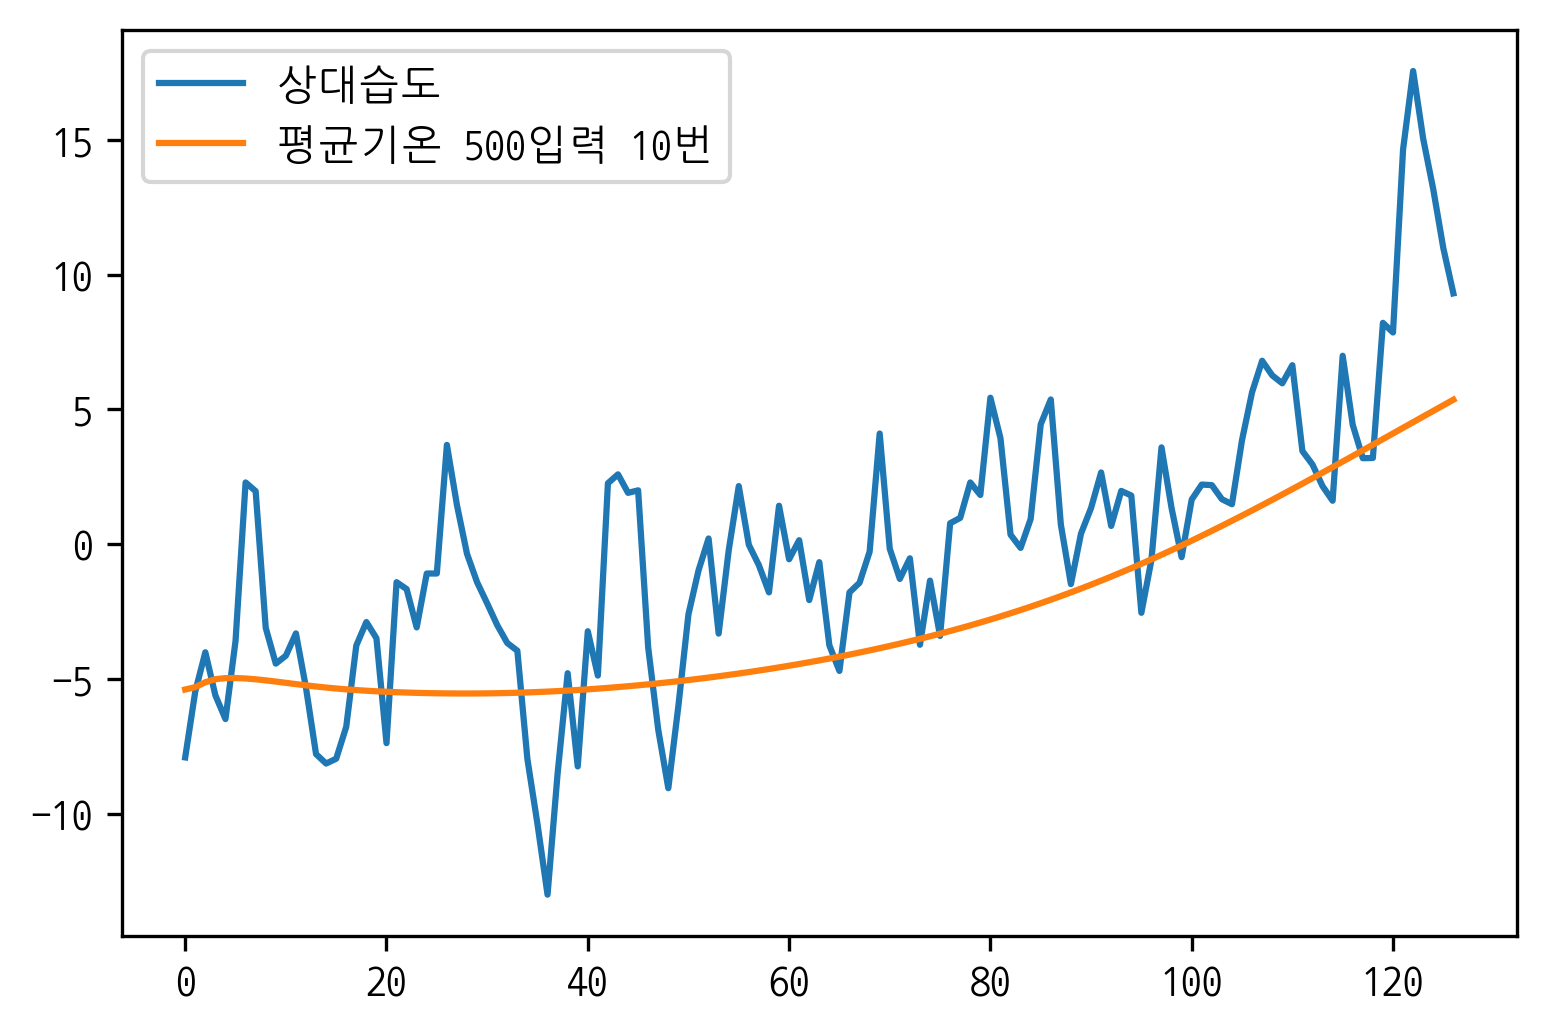

In [1121]:
fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(ef_mean2[ef_mean2['지역']=='강원도']['최저기온(°C)'].iloc[:492-365],label='상대습도')
ax.plot(v123[365:492]*10,label="평균기온 500입력 10번")
plt.legend()
plt.show()

In [178]:
k=ef_mean['평균 상대습도(%)']
n_data_gl = k.iloc[-180:]/100
n_data_gl  = np.array(n_data_gl).reshape(1,180,1)
model.predict(n_data_gl)*100



array([[67.0422]], dtype=float32)

In [165]:
k=ef_mean['평균 상대습도(%)']
n_data_gl = (k.iloc[-90:]/k.iloc[-90])-1

n_data_gl  = np.array(n_data_gl).reshape(1,90,1)
model.predict(n_data_gl)
n = float(model.predict(n_data_gl))

print('시작값',k.iloc[-90])
# k=list(data['합계 일사량(MJ/m2)'])

시작값 78.5


In [169]:
n = float(model.predict(n_data_gl))
print('예측 정제값 ',n)
a = float((n+1)*k.iloc[-90])
print('역산값',a)

예측 정제값  0.2467130720615387
역산값 24.67130720615387


In [126]:
k = list(k)
k.append(a)
k = np.array(k)

In [99]:
n_data_gl

array([[[ 0.        ],
        [-0.15834933],
        [ 0.05734165],
        [-0.20465451],
        [-0.19721689],
        [-0.09980806],
        [-0.09596929],
        [-0.20345489],
        [-0.1559501 ],
        [-0.07173704],
        [-0.08541267],
        [-0.05182342],
        [-0.05158349],
        [ 0.04894434],
        [ 0.0309501 ],
        [ 0.00095969],
        [-0.03166987],
        [-0.04966411],
        [-0.03334933],
        [ 0.0196737 ],
        [-0.01223608],
        [-0.22576775],
        [-0.20801344],
        [-0.16602687],
        [-0.17826296],
        [-0.21833013],
        [-0.20345489],
        [-0.12787908],
        [-0.04774472],
        [-0.02615163],
        [-0.12667946],
        [-0.12859885],
        [-0.09548944],
        [-0.20873321],
        [-0.19841651],
        [-0.21641075],
        [-0.10604607],
        [-0.12979846],
        [-0.04318618],
        [-0.14179463],
        [-0.52159309],
        [-0.24760077],
        [-0.08565259],
        [ 0

In [27]:

aa = pd.read_csv('../data/dd/과일.csv')
aa.head()

,시도별,항목,단위,1980 년,1981 년,1982 년,1983 년,1984 년,1985 년,1986 년,...,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,Unnamed: 42
0,계,과채류:면적,ha,43196.3,38262.0,44120.0,34999.0,38158.0,40122.0,39333.0,...,48296.0,46595.0,48418.0,46432.0,50097.0,48784.0,44661,4.194250e+04,4.207773e+04,NaN
1,계,생산량,톤,779729.7,717102.0,833283.0,664659.0,758466.0,812253.0,770391.0,...,2052198.0,1932947.0,2067741.0,2032903.0,2179553.0,2082403.0,1940733,1.890612e+06,1.880890e+06,NaN
2,계,수박:면적,ha,15686.8,12515.0,16356.0,13366.0,17658.0,21208.0,22625.0,...,16396.0,15717.0,15182.0,14885.0,16865.0,15185.0,13440,1.266070e+04,1.181381e+04,NaN
3,계,생산량,톤,334598.3,290690.0,369907.0,303437.0,389227.0,472684.0,483097.0,...,678810.0,608986.0,642945.0,672914.0,686883.0,634352.0,570160,5.064710e+05,4.766340e+05,NaN
4,계,노지수박:면적,ha,15686.8,12515.0,16356.0,13366.0,17658.0,21208.0,22625.0,...,2293.0,2722.0,2446.0,2586.0,2855.0,2613.0,2273,2.725791e+03,2.366976e+03,NaN


In [28]:
aa = aa[50:]
aab = pd.DataFrame(aa.T)
aab.columns =aab.iloc[0,:]+"-"+aab.iloc[1,:]+"("+aab.iloc[2]+")"
aab1= aab.iloc[:,500:550]
aab1 = aab1.fillna(0)
# aab.drop(aab[aab[]])
aab1 = aab1[3:]
aab1.head()

,충청북도-과채류:면적(ha),충청북도-생산량(톤),충청북도-수박:면적(ha),충청북도-생산량(톤),충청북도-노지수박:면적(ha),충청북도-10a당 생산량(kg),충청북도-생산량(톤),충청북도-시설수박:면적(ha),충청북도-10a당 생산량(kg),충청북도-생산량(톤),...,충청북도-10a당 생산량(kg),충청북도-생산량(톤),충청북도-토마토:면적(ha),충청북도-생산량(톤),충청북도-노지토마토:면적(ha),충청북도-10a당 생산량(kg),충청북도-생산량(톤),충청북도-시설토마토:면적(ha),충청북도-10a당 생산량(kg),충청북도-생산량(톤)
1980 년,1911.9,28655.8,653.7,10661.8,653.7,1631,10661.8,0,0,0,...,0,0,58.7,884,58.7,1506,884,0,0,0
1981 년,1562,24165,412,7564,412,1836,7564,0,0,0,...,0,0,69,1653,69,2396,1653,0,0,0
1982 년,2541,41151,961,17567,961,1828,17567,0,0,0,...,0,0,48,1115,48,2323,1115,0,0,0
1983 년,1852,35619,784,17938,784,2288,17938,0,0,0,...,0,0,31,802,31,2588,802,0,0,0
1984 년,2297,46058,955,22500,955,2356,22500,0,0,0,...,0,0,52,1483,52,2852,1483,0,0,0


In [31]:
aab12 = aab1.drop(['충청북도-10a당 생산량(kg)'], axis=1)
aab12.columns
for i in range()

Index(['충청북도-과채류:면적(ha)', '충청북도-생산량(톤)', '충청북도-수박:면적(ha)', '충청북도-생산량(톤)',
       '충청북도-노지수박:면적(ha)', '충청북도-생산량(톤)', '충청북도-시설수박:면적(ha)', '충청북도-생산량(톤)',
       '충청북도-참외:면적(ha)', '충청북도-생산량(톤)', '충청북도-노지참외:면적(ha)', '충청북도-생산량(톤)',
       '충청북도-시설참외:면적(ha)', '충청북도-생산량(톤)', '충청북도-딸기:면적(ha)', '충청북도-생산량(톤)',
       '충청북도-노지딸기:면적(ha)', '충청북도-생산량(톤)', '충청북도-시설딸기:면적(ha)', '충청북도-생산량(톤)',
       '충청북도-오이:면적(ha)', '충청북도-생산량(톤)', '충청북도-노지오이:면적(ha)', '충청북도-생산량(톤)',
       '충청북도-시설오이:면적(ha)', '충청북도-생산량(톤)', '충청북도-호박:면적(ha)', '충청북도-생산량(톤)',
       '충청북도-노지호박:면적(ha)', '충청북도-생산량(톤)', '충청북도-시설호박:면적(ha)', '충청북도-생산량(톤)',
       '충청북도-토마토:면적(ha)', '충청북도-생산량(톤)', '충청북도-노지토마토:면적(ha)', '충청북도-생산량(톤)',
       '충청북도-시설토마토:면적(ha)', '충청북도-생산량(톤)'],
      dtype='object')

In [25]:
aab12

,전라남도-과채류:면적(ha),전라남도-생산량(톤),전라남도-수박:면적(ha),전라남도-생산량(톤),전라남도-노지수박:면적(ha),전라남도-생산량(톤),전라남도-시설수박:면적(ha),전라남도-생산량(톤),전라남도-참외:면적(ha),전라남도-생산량(톤),...,경상남도-10a당 생산량(kg),경상남도-생산량(톤),경상남도-토마토:면적(ha),경상남도-생산량(톤),경상남도-노지토마토:면적(ha),경상남도-10a당 생산량(kg),경상남도-생산량(톤),경상남도-시설토마토:면적(ha),경상남도-10a당 생산량(kg),경상남도-생산량(톤)
1980 년,6807.3,116882,4106.2,73008.2,4106.2,73008.2,0,0,1012.1,18319,...,0,0,250.7,6563.3,250.7,2618,6563.3,0,0,0
1981 년,5892,101061,3378,61682,3378,61682,0,0,766,13374,...,0,0,355,8733,355,2460,8733,0,0,0
1982 년,5760,108976,3562,72985,3562,72985,0,0,773,14192,...,0,0,298,7924,298,2659,7924,0,0,0
1983 년,4134,79608,2441,54093,2441,54093,0,0,401,6580,...,0,0,191,5457,191,2857,5457,0,0,0
1984 년,5462,100482,3446,71194,3446,71194,0,0,433,7274,...,0,0,187,5550,187,2968,5550,0,0,0
1985 년,5803,106085,3803,74615,3803,74615,0,0,557,10165,...,0,0,169,4742,169,2806,4742,0,0,0
1986 년,5230,99742,3648,74966,3648,74966,0,0,381,6801,...,0,0,171,5857,171,3425,5857,0,0,0
1987 년,5592,98299,4093,75925,4093,75925,0,0,363,6451,...,0,0,156,3933,156,2521,3933,0,0,0
1988 년,7313,194236,3804,78637,3613,72332,191,6305,356,6461,...,2983,8233,406,11718,106,2451,2598,300,3040,9120
1989 년,8176,213000,4332,92044,4012,82527,320,9517,496,9362,...,2955,10372,414,13068,80,3150,2520,334,3158,10548


In [4]:
weather = pd.read_csv('../data/dd/날씨통합.csv')

In [7]:
from tensorflow.python.keras.models import load_model
model = load_model('../data/dd/model_기온/강원도_기온예측모델_최저기온.h5')

In [21]:
d = weather[weather['지역']=='강원도']
d['최저기온(°C)'] = d['최저기온(°C)'].fillna(0).astype(float)
d = d.drop(['Unnamed: 0'], 1)
mid_temp=d['최저기온(°C)'].values
mean = mid_temp.mean()
std = mid_temp.std()

seq_len = 30
sequence_length = seq_len + 1 # 51번째값 예측값
result = []
for index in range(len(mid_temp)-sequence_length):
    result.append(mid_temp[index:index+sequence_length])
print(result[-3:])
len(result)
result = np.array(result)

nomalized_data = []
for window in result:
    # 첫번째값을 0으로 설정, 즉, 자기자신 / 자기자신 - 1 = 0
    # 두번째값은 두번째값 / 첫번째값 -1 = 결과값
    # 계속진행하면 결과는 정규화된 값을 얻을 수 있다.
    nomalized_window = [(((float(p)-mean) / std)) for p in window]
    nomalized_data.append(nomalized_window)

result = np.array(nomalized_data)
row = int(round(result.shape[0]*0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train.shape # 2차원 배열
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:,-1]
x_train.shape # 3차원 배열

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:,-1]
x_train.shape, x_test.shape, y_train.shape

[array([ 3.45      ,  2.95      ,  2.15      ,  1.60714286,  6.98571429,
        4.42142857,  3.18571429,  3.19285714,  8.20714286,  7.85      ,
       14.63571429, 17.55      , 15.03571429, 13.16428571, 10.97857143,
        9.3       ,  7.62857143,  9.05      , 11.97857143, 12.85714286,
       13.54285714, 10.85714286,  8.5       , 10.76428571, 13.1       ,
       13.37142857, 14.74285714, 13.98571429,  7.96428571,  6.67142857,
        6.86428571]), array([ 2.95      ,  2.15      ,  1.60714286,  6.98571429,  4.42142857,
        3.18571429,  3.19285714,  8.20714286,  7.85      , 14.63571429,
       17.55      , 15.03571429, 13.16428571, 10.97857143,  9.3       ,
        7.62857143,  9.05      , 11.97857143, 12.85714286, 13.54285714,
       10.85714286,  8.5       , 10.76428571, 13.1       , 13.37142857,
       14.74285714, 13.98571429,  7.96428571,  6.67142857,  6.86428571,
       10.71428571]), array([ 2.15      ,  1.60714286,  6.98571429,  4.42142857,  3.18571429,
        3.19285714,

((16210, 30, 1), (1801, 30, 1), (16210,))

In [22]:
pred = model.predict(x_test)

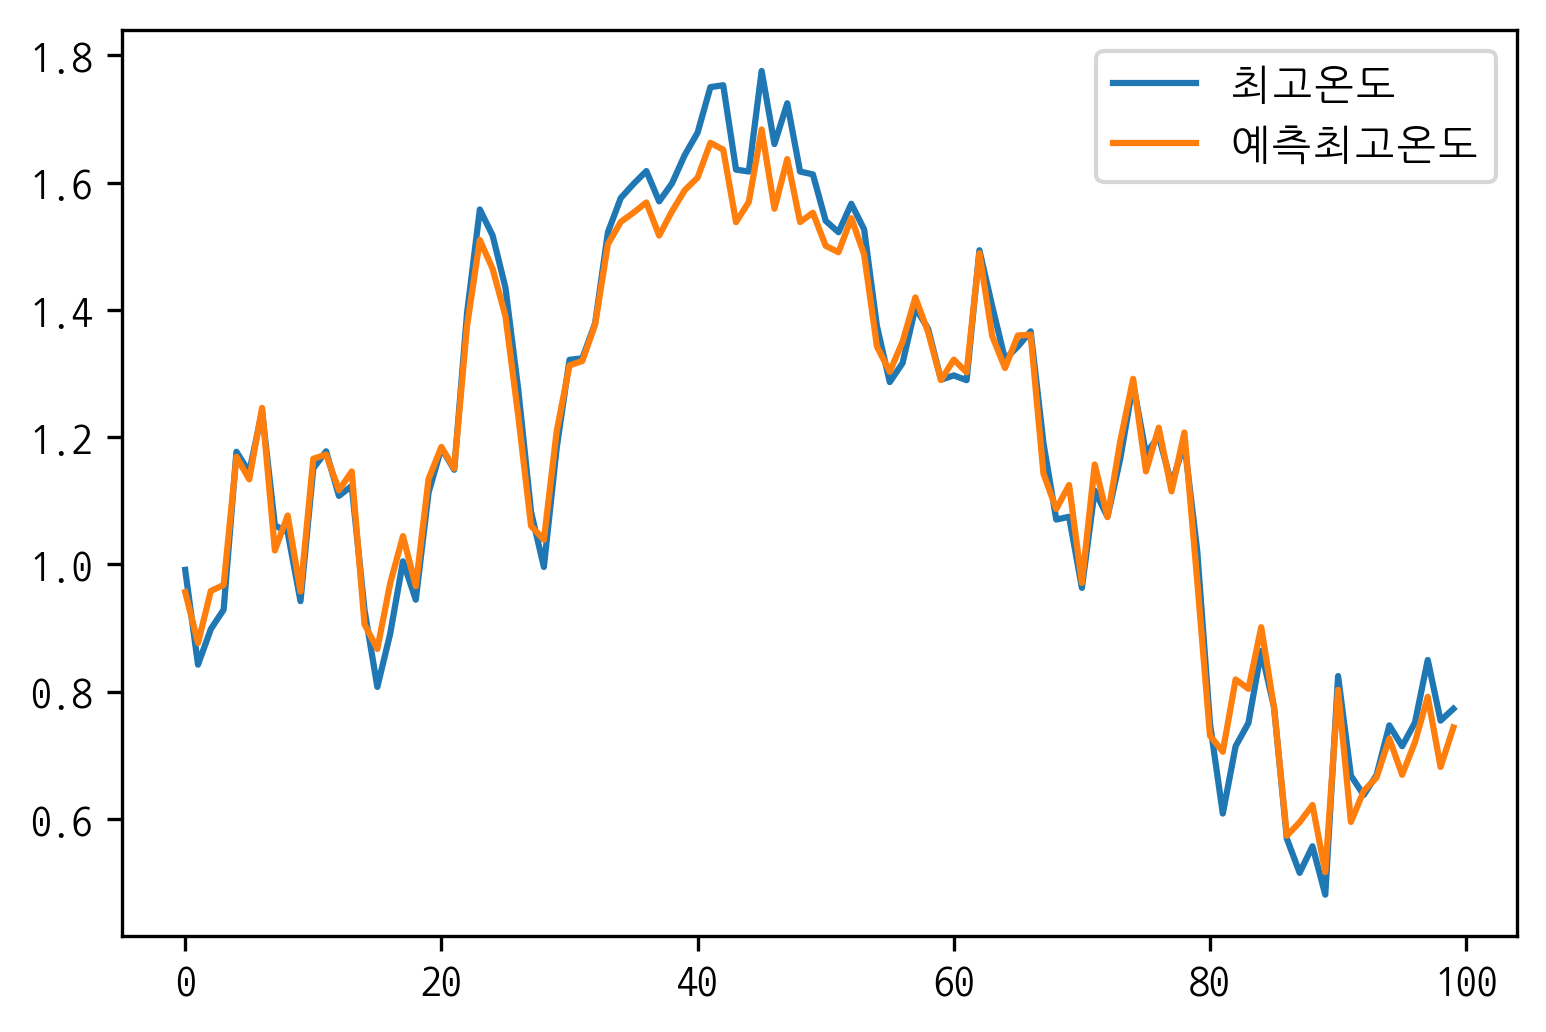

In [23]:
fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(y_test[:100],label='최고온도')
ax.plot(pred[1:101],label="예측최고온도")
plt.legend()
plt.show()

In [24]:
# 기존의 값들을 정리함
mid_temp=d['최저기온(°C)'].values

In [26]:
abc(mid_temp)

13.805891036987305
13.38514232635498
13.175054550170898
12.966025352478027
12.764022827148438
12.646280288696289
12.62260627746582
12.792892456054688
13.1337890625
13.492077827453613
13.813448905944824
14.096040725708008
14.345030784606934
14.56308364868164
14.759830474853516
14.946053504943848
15.122819900512695
15.291533470153809
15.450258255004883
15.598408699035645
15.745182991027832
15.897571563720703
16.055133819580078
16.218338012695312
16.385101318359375
16.544178009033203
16.693904876708984
16.83654022216797
16.980113983154297
17.127647399902344


In [17]:
def abc(mid_temp):
    # 표준편차, 평균
    for i in range(30):
        mean = mid_temp.mean()
        std = mid_temp.std()
        # model의 input에 맞게 전처리
        pr=((mid_temp[-30:]-mean)/std)
        # pr.shape (30,)
        pk = pr.reshape(1,30,1)
        a = model.predict(pk) # 예측값
        k = float((a*std)+mean) # 예측값 원상복귀
        print(k)
        # 원래 자료를 list해서 원상복귀된 예측값을 집어넣고 다시 numpy로 변환
        mid_temp = list(mid_temp) 
        mid_temp.append(k)
        # 예측값을 포함한 자료가 생성됨
        mid_temp = np.array(mid_temp)
        
    

In [82]:
# 예측값이 포함된 std와 mean를 적용 
mean = mid_temp.mean()
std = mid_temp.std()
# 
pr=((mid_temp[-30:]-mean)/std)
pk = pr.reshape(1,30,1)
a = model.predict(pk)
a

array([[0.48009402]], dtype=float32)

In [83]:
a*std+mean

array([[17.2713]], dtype=float32)

array([-1.7     , -3.3     , -3.3     , ..., 17.1     , 16.748909,
       16.748909])